<a href="https://colab.research.google.com/github/JuneWayne/DS3021-EDA/blob/main/lab/Ethan_Cao_GSS_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('GSS.xlsx')

In [58]:
# Renaming column headers' abbreviations for readability
df.rename(columns={'id_':'ID','occ10': 'Occupation', 'rincome':'Income Group','hourly':'Hourly Wage Pre Tax', 'daily':'Daily Wage Pre Tax','tax':'Income Tax Opinion','satjob':'Job Satisfaction','weekly':'Weekly Wage Pre Tax','stockops':'Stock Options','extrapay':'Performance Based Pay Eligibility', 'taxspend':'Low Tax Or Govt Spend','conrinc':'Respondant Income','monthly':'Monthly Wage Pre Tax', 'yearly':'Annual Wage Pre Tax' }, inplace=True)
df

,year,ID,Occupation,Income Group,Income Tax Opinion,Job Satisfaction,Hourly Wage Pre Tax,Daily Wage Pre Tax,Weekly Wage Pre Tax,Monthly Wage Pre Tax,Annual Wage Pre Tax,Stock Options,Performance Based Pay Eligibility,Low Tax Or Govt Spend,Respondant Income,ballot
0,1972,1,"Wholesale and retail buyers, except farm products",.i: Inapplicable,.i: Inapplicable,A little dissatisfied,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,-100.0,.i: Inapplicable
1,1972,2,First-line supervisors of production and opera...,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,-100.0,.i: Inapplicable
2,1972,3,Real estate brokers and sales agents,.i: Inapplicable,.i: Inapplicable,Moderately satisfied,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,-100.0,.i: Inapplicable
3,1972,4,Accountants and auditors,.i: Inapplicable,.i: Inapplicable,Very satisfied,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,-100.0,.i: Inapplicable
4,1972,5,Telephone operators,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,-100.0,.i: Inapplicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72385,2022,3541,"Hotel, motel, and resort desk clerks",.i: Inapplicable,Too high,Moderately satisfied,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,-100.0,Ballot a
72386,2022,3542,Elementary and middle school teachers,$25000 OR MORE,Too high,Very satisfied,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,42727.5,Ballot a
72387,2022,3543,Respiratory therapists,$25000 OR MORE,.i: Inapplicable,Very satisfied,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.i: Inapplicable,.i: Inapplicable,.y: Not available in this year,52222.5,Ballot b
72388,2022,3544,Elementary and middle school teachers,$25000 OR MORE,About right,Very satisfied,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.y: Not available in this year,.i: Inapplicable,NO,.y: Not available in this year,42727.5,Ballot c


In [59]:
df.columns

Index(['year', 'ID', 'Occupation', 'Income Group', 'Income Tax Opinion',
       'Job Satisfaction', 'Hourly Wage Pre Tax', 'Daily Wage Pre Tax',
       'Weekly Wage Pre Tax', 'Monthly Wage Pre Tax', 'Annual Wage Pre Tax',
       'Stock Options', 'Performance Based Pay Eligibility',
       'Low Tax Or Govt Spend', 'Respondant Income', 'ballot'],
      dtype='object')

<Axes: xlabel='Hourly Wage Pre Tax', ylabel='Density'>

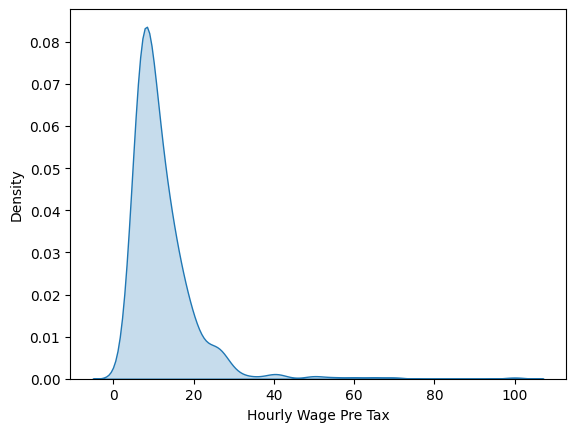

In [60]:
# Cleaning up the 'inapplicable' and 'not available' labels in the data set
df.replace(to_replace=['Inapplicable','Not available in this year'], value=pd.NA, regex=True,inplace=True)

filtered_HW = df.loc[df['Hourly Wage Pre Tax'].notna(), 'Hourly Wage Pre Tax']
filtered_HW.value_counts()

# replacing odd entries with null values
replacement_values = {'.n:  No answer':pd.NA,
                      '.d:  Do not Know/Cannot Choose':pd.NA,
                      '.s:  Skipped on Web':pd.NA,
                      'R pays no income tax (vol.)':'Respondant Does\nNot Pay Tax',
                      '.d:  Do not Know/Cannot Choose':pd.NA,
                      'NaN':pd.NA,
                      '.s:  Skipped on Web':pd.NA,
                      '.r:  Refused':pd.NA,
                      }

# learning about the distribution of pre-tax hourly wage
filtered_HW = filtered_HW.replace(replacement_values)
filtered_HW = pd.to_numeric(filtered_HW, errors='coerce')
sns.kdeplot(data=filtered_HW, fill=True)


# Exploring the distribution on opinion on income tax and Pre-tax monthly wage

Income Tax Opinion
Too high                        24553
About right                     14861
Too low                           532
Respondant Does\nNot Pay Tax      302
Name: count, dtype: int64


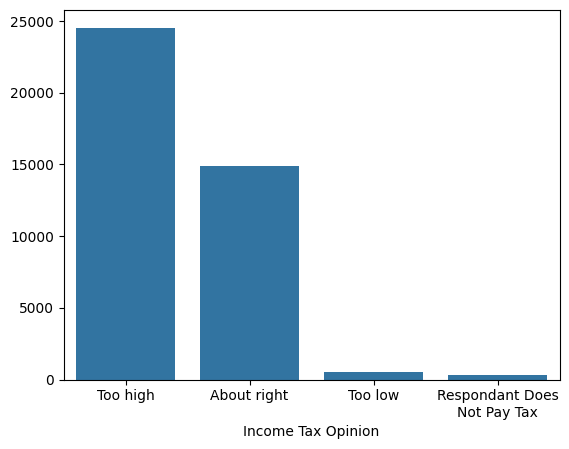

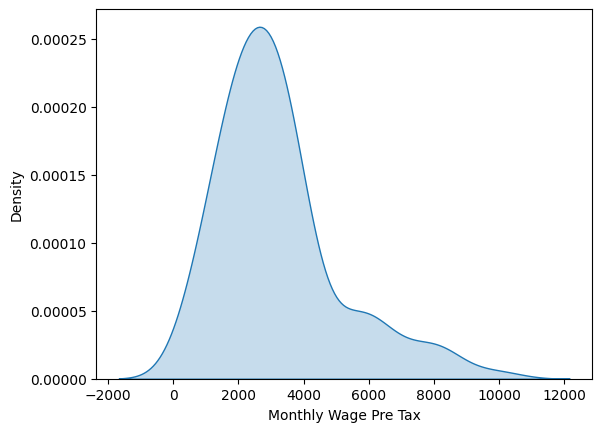

In [61]:
# learning about how people think about the income tax policy
filtered_ITO = df.loc[df['Income Tax Opinion'].notna(), 'Income Tax Opinion']
filtered_ITO = filtered_ITO.replace(replacement_values)
print(filtered_ITO.value_counts())

sns.barplot(x=filtered_ITO.value_counts().index, y=filtered_ITO.value_counts().values)
plt.show()
filtered_MW = df.loc[df['Monthly Wage Pre Tax'].notna(), 'Monthly Wage Pre Tax']
filtered_MW = filtered_MW.replace(replacement_values)
filtered_MW = pd.to_numeric(filtered_MW, errors='coerce')

# distribution of pre-tax monthly wage
sns.kdeplot(data=filtered_MW, fill=True)
plt.show()


# How does Pre-Tax Monthly Wage affect opinion on Taxation

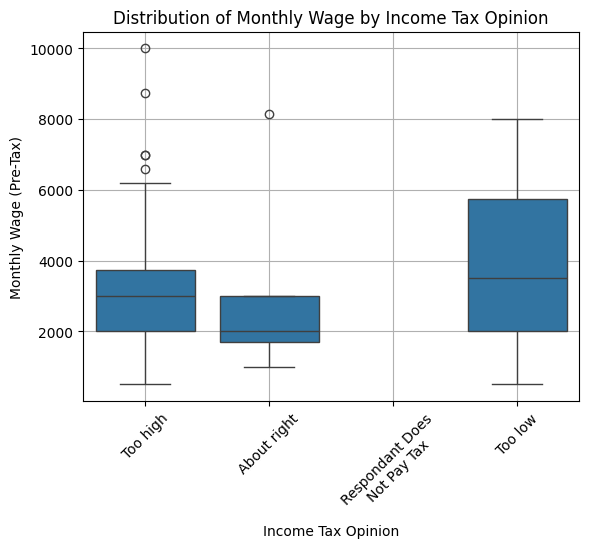

,Income Tax Opinion,Monthly Wage Pre Tax
0,About right,2000.0
2,Too high,3000.0
3,Too low,3500.0
1,Respondant Does\nNot Pay Tax,NaN


In [62]:

# clean up each variables
df['Income Tax Opinion'] = df['Income Tax Opinion'].replace(replacement_values)
df['Monthly Wage Pre Tax'] = df['Monthly Wage Pre Tax'].replace(replacement_values)
df['Monthly Wage Pre Tax'] = pd.to_numeric(df['Monthly Wage Pre Tax'], errors='coerce')
grouped_data = df.groupby("Income Tax Opinion")["Monthly Wage Pre Tax"].median().reset_index()
grouped_data = grouped_data.sort_values(by="Monthly Wage Pre Tax")


# using bar plot to see what are the background of the respondants that chose a particular response
sns.boxplot(data=df, x="Income Tax Opinion", y="Monthly Wage Pre Tax")
plt.xticks(rotation=45)
plt.title("Distribution of Monthly Wage by Income Tax Opinion")
plt.xlabel("Income Tax Opinion")
plt.ylabel("Monthly Wage (Pre-Tax)")
plt.grid(True)
plt.show()
grouped_data

# ^ It is interesting how the category of respondants with the highest median wage believes that income tax is 'Too Low', meanwhile the ones who believe that income tax is too high are the ones with the second highest monthly income, but with a few outliers of extremely high monthly income

In [63]:
# showing column headers for future references
df.columns

Index(['year', 'ID', 'Occupation', 'Income Group', 'Income Tax Opinion',
       'Job Satisfaction', 'Hourly Wage Pre Tax', 'Daily Wage Pre Tax',
       'Weekly Wage Pre Tax', 'Monthly Wage Pre Tax', 'Annual Wage Pre Tax',
       'Stock Options', 'Performance Based Pay Eligibility',
       'Low Tax Or Govt Spend', 'Respondant Income', 'ballot'],
      dtype='object')

# Do respondants prefer lower taxation or increase in Government spending on social programs?

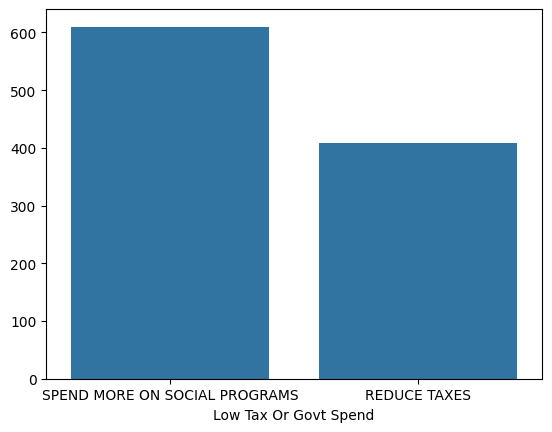

In [64]:
# observing how people consider about general govt tax policies: spend more on social programs or reduce tax?
filtered_LTGS = df.loc[df['Low Tax Or Govt Spend'].notna(), 'Low Tax Or Govt Spend']

filtered_LTGS = filtered_LTGS.replace(replacement_values)

sns.barplot(x=filtered_LTGS.value_counts().index, y=filtered_LTGS.value_counts().values)
plt.show()


# Attempting to compare opinions for reduction of tax expenditure with the hourly/monthly/annual wage level of respondants

In [65]:
# attempting to compare how people with varying levels of pre-tax hourly wage consider about the general govt tax policy
# but failed due to the two variables of data being collected in separate years

df_compare = df[['Hourly Wage Pre Tax', 'Low Tax Or Govt Spend']].copy()
df_compare['Hourly Wage Pre Tax'] = df_compare['Hourly Wage Pre Tax'].replace(replacement_values)
pd.crosstab(df_compare['Hourly Wage Pre Tax'], df_compare['Low Tax Or Govt Spend'])


Low Tax Or Govt Spend
Hourly Wage Pre Tax


### ^ it turns out since the data are collected at two distinct dates (one is collected only in 1996 and another is collected only in 1998), it is impossible to crosstabulate or create a relationship between the two variables

In [66]:
# showing the column headers for future references
df.columns

Index(['year', 'ID', 'Occupation', 'Income Group', 'Income Tax Opinion',
       'Job Satisfaction', 'Hourly Wage Pre Tax', 'Daily Wage Pre Tax',
       'Weekly Wage Pre Tax', 'Monthly Wage Pre Tax', 'Annual Wage Pre Tax',
       'Stock Options', 'Performance Based Pay Eligibility',
       'Low Tax Or Govt Spend', 'Respondant Income', 'ballot'],
      dtype='object')

# Exploring the distribution of Income Group of Respondants

Income Group
$25000 OR MORE     18249
$10000 TO 14999     5138
$20000 TO 24999     4125
$15000 TO 19999     4048
$1000 TO 2999       1952
$8000 TO 9999       1840
$1000 OR LESS       1365
$3000 TO 3999       1300
$5000 TO 5999       1149
$4000 TO 4999       1099
$6000 TO 6999       1037
$7000 TO 7999       1031
Name: count, dtype: int64


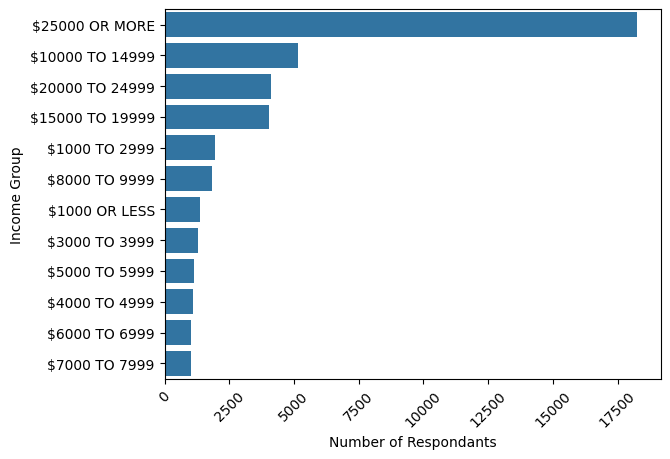

In [67]:
# the variable of income group has some bad naming conventions, here I am standardizing and cleaning odd names and the way income group is represented
df['Income Group'].value_counts()
replacement_values = {'.n:  No answer':pd.NA,
                      '.d:  Do not Know/Cannot Choose':pd.NA,
                      '.s:  Skipped on Web':pd.NA,
                      'R pays no income tax (vol.)':'Respondant Does\nNot Pay Tax',
                      '.d:  Do not Know/Cannot Choose':pd.NA,
                      'NaN':pd.NA,
                      '.s:  Skipped on Web':pd.NA,
                      '.r:  Refused':pd.NA,
                      '$10000 - 14999':'$10000 TO 14999',
                      '$20000 - 24999':'$20000 TO 24999',
                      '$15000 - 19999':'$15000 TO 19999',
                      'LT $1000':'$1000 OR LESS'}
df['Income Group'] = df['Income Group'].replace(replacement_values)
print(df['Income Group'].value_counts())

# Understanding the distribution of income groups
sns.barplot(x=df['Income Group'].value_counts().values, y=df['Income Group'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Number of Respondants')
plt.ylabel('Income Group')
plt.show()

# Cross Tabulating different categories of tax satisfaction

In [68]:
# seeing how job satisfaction and income tax opinion relates to the opinion of general govt tax policies
# creating a copy of the original dataframe to avoid causing damages or alterations
df_compare2 = df[['year', 'Respondant Income', 'Job Satisfaction','Low Tax Or Govt Spend', 'Income Group', 'Occupation', 'Income Tax Opinion']].copy()

df_compare2['Low Tax Or Govt Spend'] = df_compare2['Low Tax Or Govt Spend'].replace(replacement_values)
df_compare2['Job Satisfaction'] = df_compare2['Job Satisfaction'].replace(replacement_values)
df_compare2['Income Group'] = df_compare2['Income Group'].replace(replacement_values)
df_compare2['Respondant Income'] = df_compare2['Respondant Income'].replace(replacement_values)
df_compare2['Income Tax Opinion'] = df_compare2['Income Tax Opinion'].replace(replacement_values)
print(pd.crosstab(df_compare2['Low Tax Or Govt Spend'], df_compare2['Job Satisfaction']),'\n')
print(pd.crosstab(df_compare2['Low Tax Or Govt Spend'], df_compare2['Income Tax Opinion']))

Job Satisfaction               A little dissatisfied  Moderately satisfied  \
Low Tax Or Govt Spend                                                        
REDUCE TAXES                                      25                   139   
SPEND MORE ON SOCIAL PROGRAMS                     57                   195   

Job Satisfaction               Very dissatisfied  Very satisfied  
Low Tax Or Govt Spend                                             
REDUCE TAXES                                  11             164  
SPEND MORE ON SOCIAL PROGRAMS                 19             216   

Income Tax Opinion             About right  Too high  Too low
Low Tax Or Govt Spend                                        
REDUCE TAXES                            64       206        0
SPEND MORE ON SOCIAL PROGRAMS          165       227        7


# Encoding scatter plot bubble size, color, and spatial location to see how profesionals in different sectors/industries feel about tax policies

# How STEM Career Professionals feel about Tax Policies

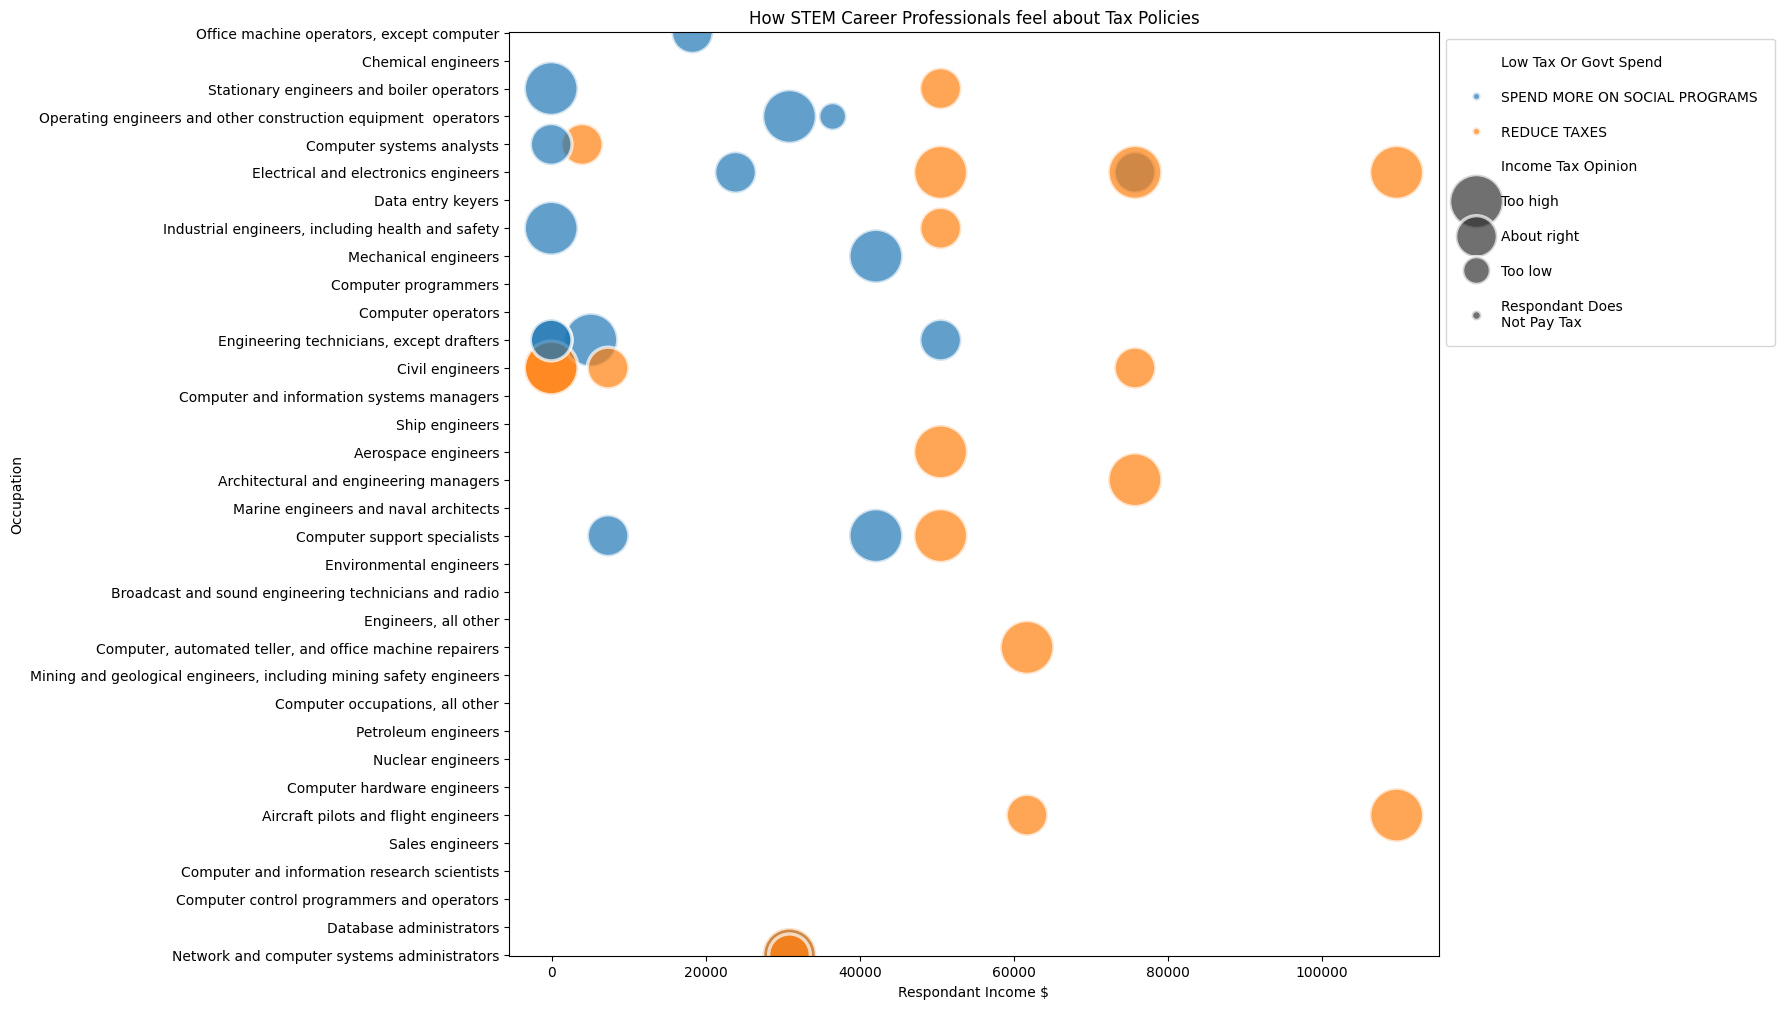

Income Tax Opinion
Too high                        1017
About right                      665
Too low                           43
Respondant Does\nNot Pay Tax       4
Name: count, dtype: int64 
 proportion of people who thinks tax is too high: 58.82%
 proportion of people who thinks tax is about right: 38.46%
 proportion of people who thinks tax is too low: 2.49%
 proportion of people does not pay tax: 0.00%

 Low Tax Or Govt Spend
REDUCE TAXES                     26
SPEND MORE ON SOCIAL PROGRAMS    25
Name: count, dtype: int64 
 proportion of people who thinks tax should be spent on social programs: 49.02%
 proportion of people who thinks tax should be reduced: 50.98%


In [69]:
# capturing key words from the occupation variable 'data, computer, engineer', to represent STEM career professionals
df_compare2 = df_compare2[df_compare2['Occupation'].str.contains('data|computer|engineer', case=False, na=False)]
plt.figure(figsize=(12, 12))

# manipulating the sizes of the bubbles manually
size_mapping = {
    'Too high': 1500,
    'About right': 900,
    'Too low': 400,
    'Respondant Does\nNot Pay Tax': 50
}
sns.scatterplot(data=df_compare2, x='Respondant Income',y='Occupation', hue='Low Tax Or Govt Spend', size='Income Tax Opinion', sizes=size_mapping, alpha=0.7)
plt.title('How STEM Career Professionals feel about Tax Policies')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),  borderpad=1.2, labelspacing=1.5, markerscale=1)
plt.gca().margins(y=0.001)
plt.xlabel('Respondant Income $')
plt.show()

# calculating the proportion of the opinion distribution
prop_high = ((df_compare2['Income Tax Opinion'] == 'Too high').sum() / df_compare2['Income Tax Opinion'].count()) * 100
prop_about = ((df_compare2['Income Tax Opinion'] == 'About right').sum() / df_compare2['Income Tax Opinion'].count()) * 100
prop_low = ((df_compare2['Income Tax Opinion'] == 'Too low').sum() / df_compare2['Income Tax Opinion'].count()) * 100
prop_respondant = ((df_compare2['Income Tax Opinion'] == 'Respondant Does Not Pay Tax').sum() / df_compare2['Income Tax Opinion'].count()) * 100

prop_spend = ((df_compare2['Low Tax Or Govt Spend'] == 'SPEND MORE ON SOCIAL PROGRAMS').sum() / df_compare2['Low Tax Or Govt Spend'].count()) * 100
prop_lower = ((df_compare2['Low Tax Or Govt Spend'] == 'REDUCE TAXES').sum() / df_compare2['Low Tax Or Govt Spend'].count()) * 100

print(df_compare2['Income Tax Opinion'].value_counts(), f'\n proportion of people who thinks tax is too high: {prop_high:.2f}%\n proportion of people who thinks tax is about right: {prop_about:.2f}%\n proportion of people who thinks tax is too low: {prop_low:.2f}%\n proportion of people does not pay tax: {prop_respondant:.2f}%')

print('\n', df_compare2['Low Tax Or Govt Spend'].value_counts(), f'\n proportion of people who thinks tax should be spent on social programs: {prop_spend:.2f}%\n proportion of people who thinks tax should be reduced: {prop_lower:.2f}%')


# How Educational professionals feel about Tax Policies

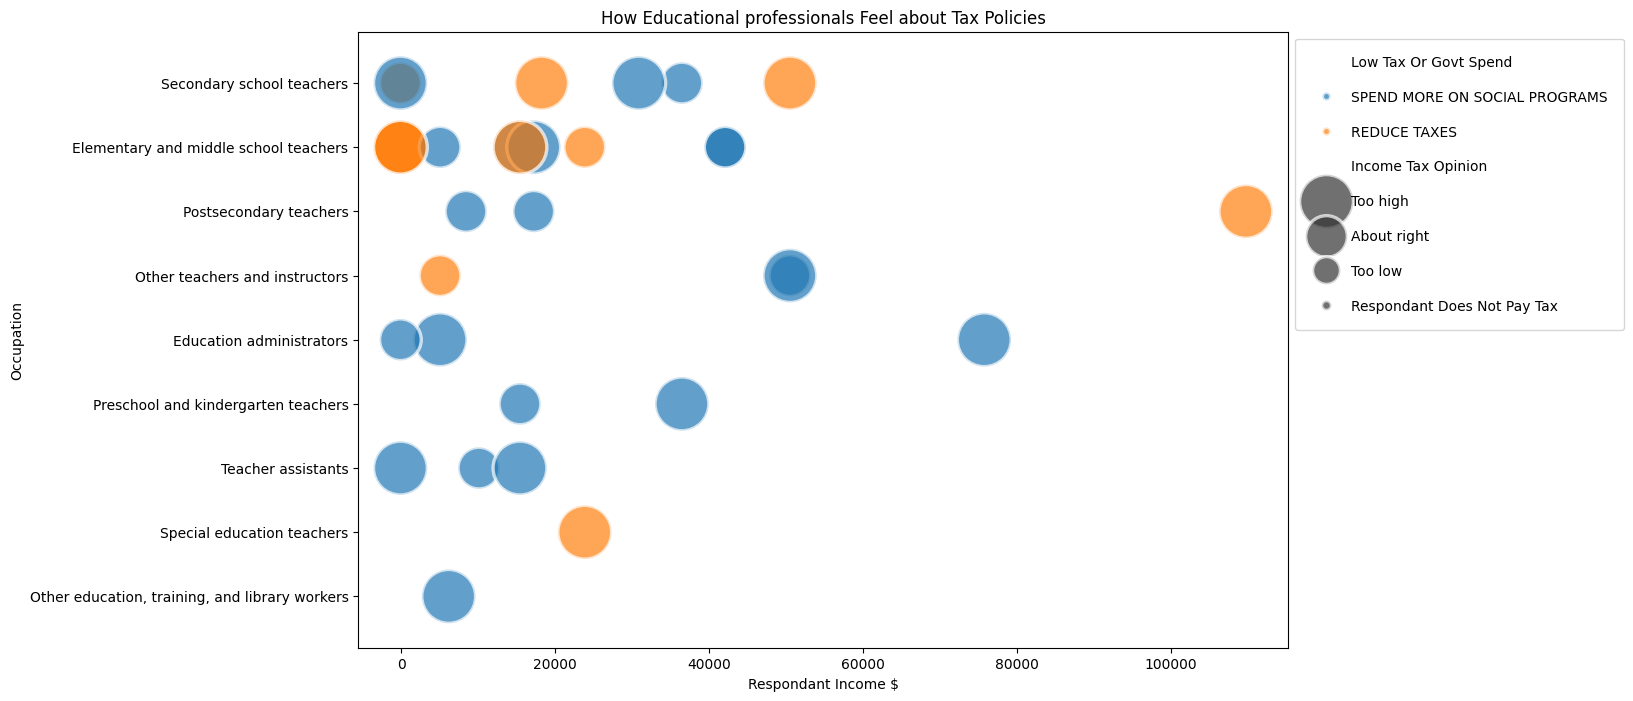

Income Tax Opinion
Too high                       1480
About right                    1025
Too low                          58
Respondant Does Not Pay Tax       0
Name: count, dtype: int64 
 proportion of people who thinks tax is too high: 57.74%
 proportion of people who thinks tax is about right: 39.99%
 proportion of people who thinks tax is too low: 2.26%
 proportion of people does not pay tax: 0.00%

 Low Tax Or Govt Spend
SPEND MORE ON SOCIAL PROGRAMS    36
REDUCE TAXES                     14
Name: count, dtype: int64 
 proportion of people who thinks tax should be spent on social programs: 72.00%
 proportion of people who thinks tax should be reduced: 28.00%


In [70]:
df_compare3 = df[['year', 'Respondant Income', 'Income Tax Opinion','Low Tax Or Govt Spend', 'Income Group', 'Occupation']].copy()
df_compare3['Respondant Income'] = df_compare3['Respondant Income'].replace(replacement_values)
df_compare3['Low Tax Or Govt Spend'] = df_compare3['Low Tax Or Govt Spend'].replace(replacement_values)
df_compare3['Income Tax Opinion'] = df_compare3['Income Tax Opinion'].replace(replacement_values)

# re-ordering the income tax opinion category
cat_order = ['Too high', 'About right', 'Too low', 'Respondant Does Not Pay Tax']
df_compare3['Income Tax Opinion'] = pd.Categorical(df_compare3['Income Tax Opinion'], categories=cat_order, ordered=True)

# capturing the keywords 'teacher|educat|professor' to represent the educational sector
df_compare3 = df_compare3[df_compare3['Occupation'].str.contains('teacher|educat|professor', case=False, na=False)]
plt.figure(figsize=(12, 8))

# manipulating the sizes of the bubbles manually
size_mapping = {
    'Too high': 1500,
    'About right': 900,
    'Too low': 400,
    'Respondant Does Not Pay Tax': 50
}
sns.scatterplot(data=df_compare3, x='Respondant Income',y='Occupation', hue='Low Tax Or Govt Spend', size='Income Tax Opinion', sizes=size_mapping, alpha=0.7)
plt.title('How Educational professionals Feel about Tax Policies')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderpad=1.2, labelspacing=1.5, markerscale=1)
plt.gca().margins(y=0.1)
plt.xlabel('Respondant Income $')
plt.show()

# calculating the proportions of the opinion distribution
prop_high = ((df_compare3['Income Tax Opinion'] == 'Too high').sum() / df_compare3['Income Tax Opinion'].count()) * 100
prop_about = ((df_compare3['Income Tax Opinion'] == 'About right').sum() / df_compare3['Income Tax Opinion'].count()) * 100
prop_low = ((df_compare3['Income Tax Opinion'] == 'Too low').sum() / df_compare3['Income Tax Opinion'].count()) * 100
prop_respondant = ((df_compare3['Income Tax Opinion'] == 'Respondant Does Not Pay Tax').sum() / df_compare3['Income Tax Opinion'].count()) * 100

prop_spend = ((df_compare3['Low Tax Or Govt Spend'] == 'SPEND MORE ON SOCIAL PROGRAMS').sum() / df_compare3['Low Tax Or Govt Spend'].count()) * 100
prop_lower = ((df_compare3['Low Tax Or Govt Spend'] == 'REDUCE TAXES').sum() / df_compare3['Low Tax Or Govt Spend'].count()) * 100

print(df_compare3['Income Tax Opinion'].value_counts(), f'\n proportion of people who thinks tax is too high: {prop_high:.2f}%\n proportion of people who thinks tax is about right: {prop_about:.2f}%\n proportion of people who thinks tax is too low: {prop_low:.2f}%\n proportion of people does not pay tax: {prop_respondant:.2f}%')

print('\n', df_compare3['Low Tax Or Govt Spend'].value_counts(), f'\n proportion of people who thinks tax should be spent on social programs: {prop_spend:.2f}%\n proportion of people who thinks tax should be reduced: {prop_lower:.2f}%')


# How blue collared professionals feel about Tax policies

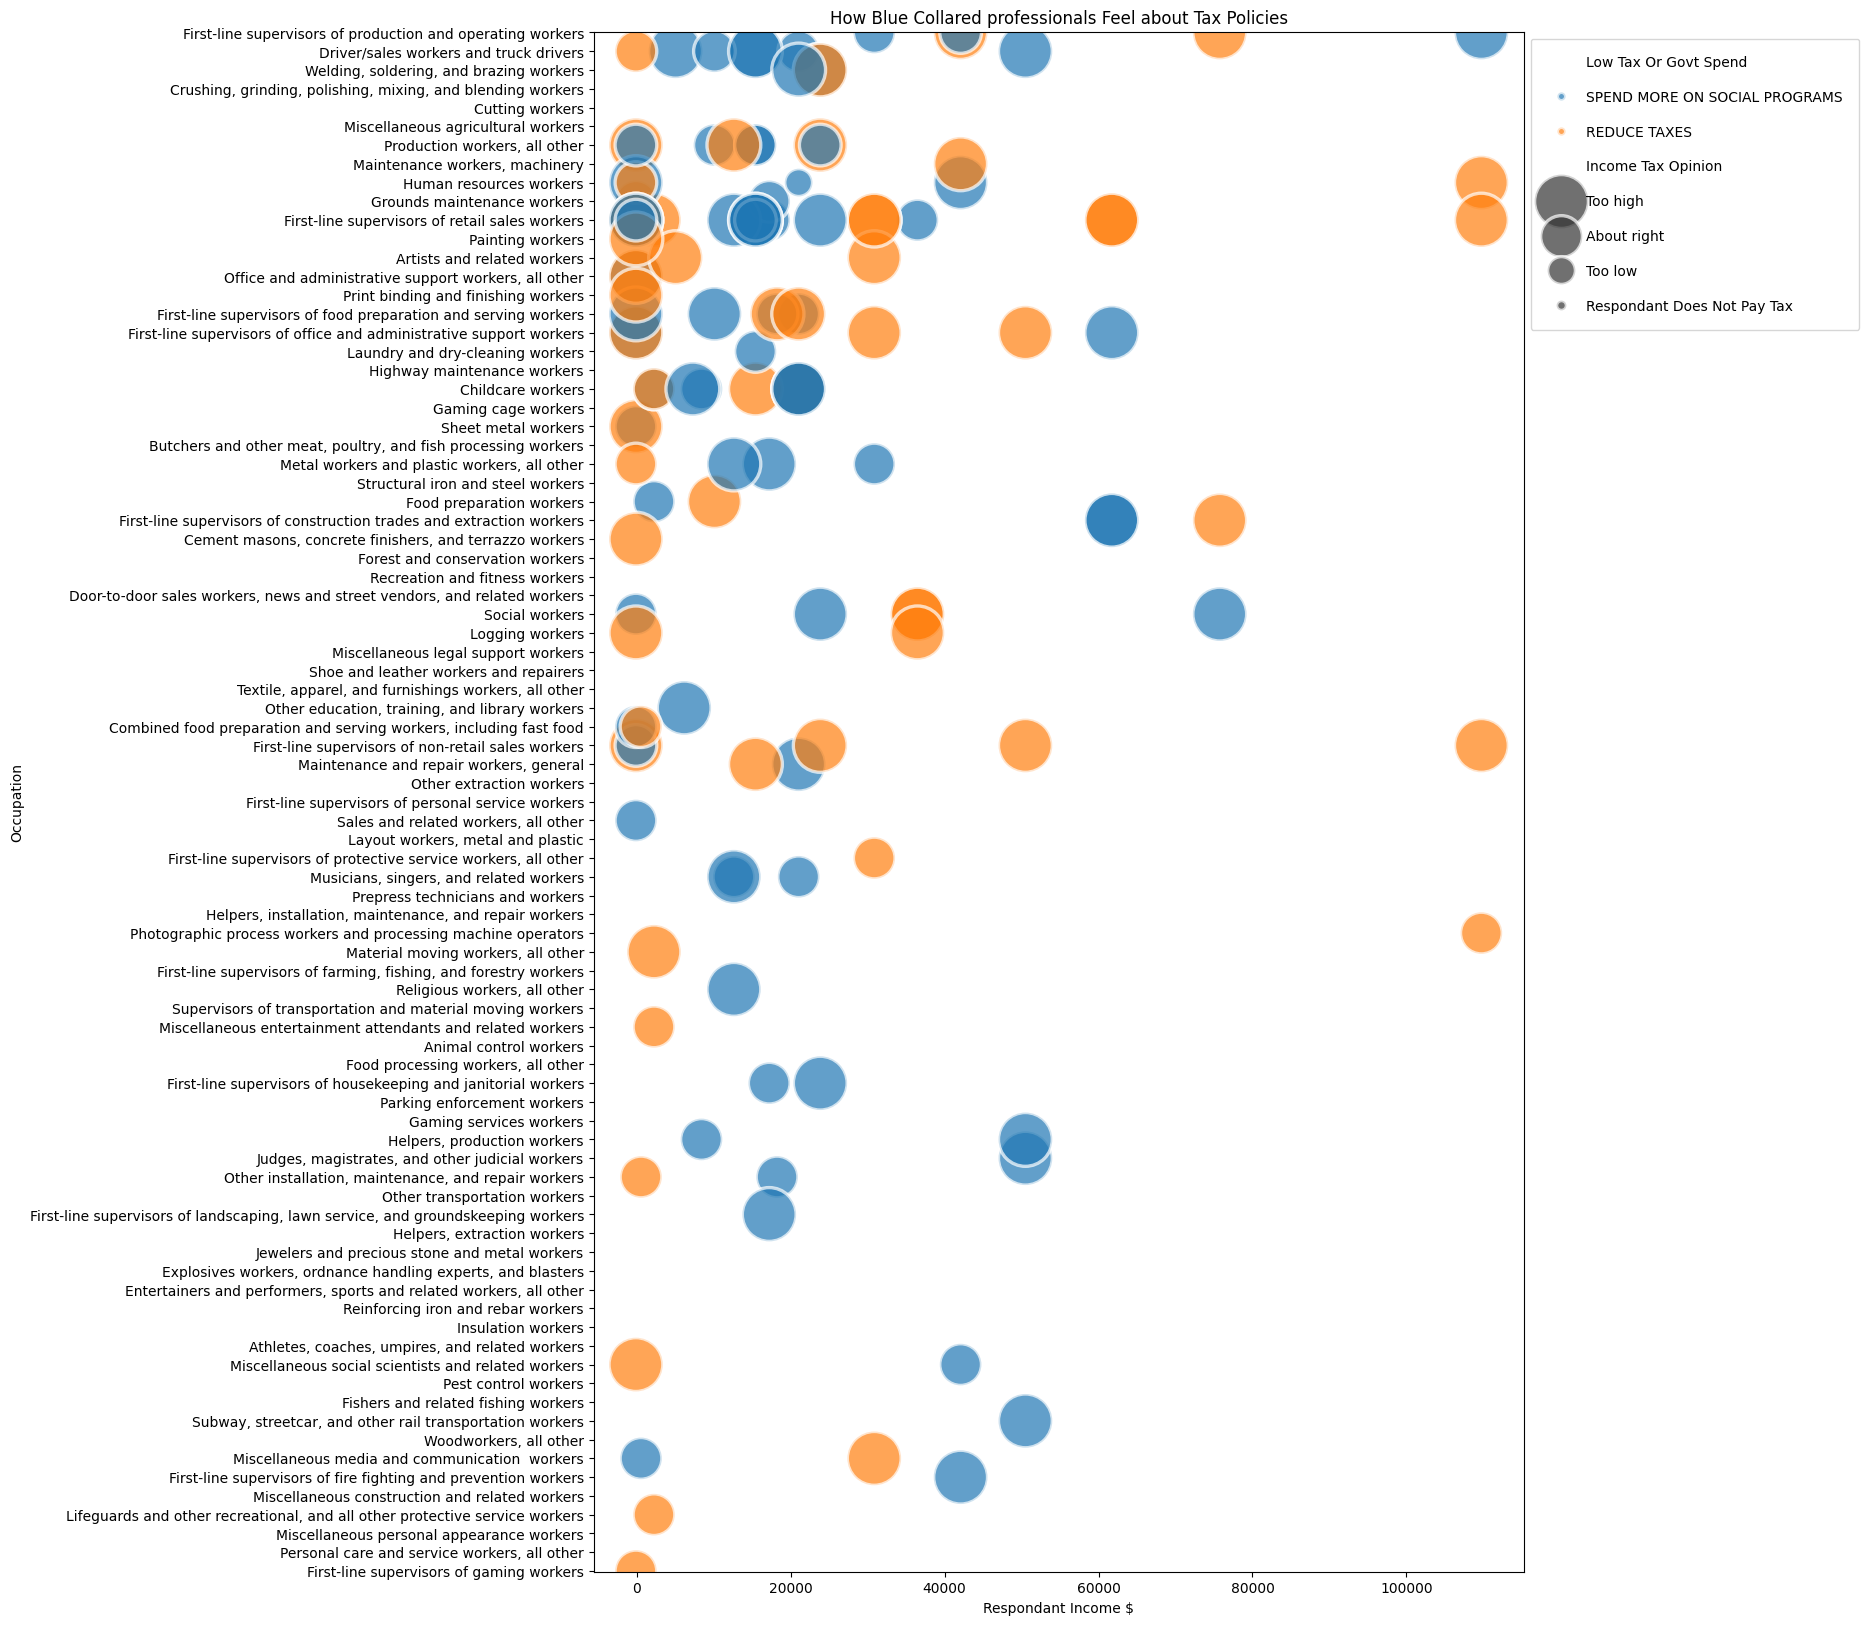

Income Tax Opinion
Too high                       4322
About right                    2472
Too low                          66
Respondant Does Not Pay Tax       0
Name: count, dtype: int64 
 proportion of people who thinks tax is too high: 63.00%
 proportion of people who thinks tax is about right: 36.03%
 proportion of people who thinks tax is too low: 0.96%
 proportion of people does not pay tax: 0.00%

 Low Tax Or Govt Spend
SPEND MORE ON SOCIAL PROGRAMS    117
REDUCE TAXES                      83
Name: count, dtype: int64 
 proportion of people who thinks tax should be spent on social programs: 58.50%
 proportion of people who thinks tax should be reduced: 41.50%


In [71]:
df_compare3 = df[['year', 'Respondant Income', 'Income Tax Opinion','Low Tax Or Govt Spend', 'Income Group', 'Occupation']].copy()
df_compare3['Respondant Income'] = df_compare3['Respondant Income'].replace(replacement_values)
df_compare3['Low Tax Or Govt Spend'] = df_compare3['Low Tax Or Govt Spend'].replace(replacement_values)
df_compare3['Income Tax Opinion'] = df_compare3['Income Tax Opinion'].replace(replacement_values)

cat_order = ['Too high', 'About right', 'Too low', 'Respondant Does Not Pay Tax']
df_compare3['Income Tax Opinion'] = pd.Categorical(df_compare3['Income Tax Opinion'], categories=cat_order, ordered=True)

# capturing the keyword 'worker' to represent blue collared professionals
df_compare3 = df_compare3[df_compare3['Occupation'].str.contains('worker', case=False, na=False)]
plt.figure(figsize=(12, 20))

# manipulating the sizes of the bubbles manually
size_mapping = {
    'Too high': 1500,
    'About right': 900,
    'Too low': 400,
    'Respondant Does Not Pay Tax': 50
}
sns.scatterplot(data=df_compare3, x='Respondant Income',y='Occupation', hue='Low Tax Or Govt Spend', size='Income Tax Opinion', sizes=size_mapping, alpha=0.7)
plt.title('How Blue Collared professionals Feel about Tax Policies')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderpad=1.2, labelspacing=1.5, markerscale=1)
plt.gca().margins(y=0.0005)
plt.xlabel('Respondant Income $')
plt.show()


# calculating the proportions of the opinion distribution
prop_high = ((df_compare3['Income Tax Opinion'] == 'Too high').sum() / df_compare3['Income Tax Opinion'].count()) * 100
prop_about = ((df_compare3['Income Tax Opinion'] == 'About right').sum() / df_compare3['Income Tax Opinion'].count()) * 100
prop_low = ((df_compare3['Income Tax Opinion'] == 'Too low').sum() / df_compare3['Income Tax Opinion'].count()) * 100
prop_respondant = ((df_compare3['Income Tax Opinion'] == 'Respondant Does Not Pay Tax').sum() / df_compare3['Income Tax Opinion'].count()) * 100

prop_spend = ((df_compare3['Low Tax Or Govt Spend'] == 'SPEND MORE ON SOCIAL PROGRAMS').sum() / df_compare3['Low Tax Or Govt Spend'].count()) * 100
prop_lower = ((df_compare3['Low Tax Or Govt Spend'] == 'REDUCE TAXES').sum() / df_compare3['Low Tax Or Govt Spend'].count()) * 100

print(df_compare3['Income Tax Opinion'].value_counts(), f'\n proportion of people who thinks tax is too high: {prop_high:.2f}%\n proportion of people who thinks tax is about right: {prop_about:.2f}%\n proportion of people who thinks tax is too low: {prop_low:.2f}%\n proportion of people does not pay tax: {prop_respondant:.2f}%')

print('\n', df_compare3['Low Tax Or Govt Spend'].value_counts(), f'\n proportion of people who thinks tax should be spent on social programs: {prop_spend:.2f}%\n proportion of people who thinks tax should be reduced: {prop_lower:.2f}%')

# How Law Enforcement professionals feel about Tax policies

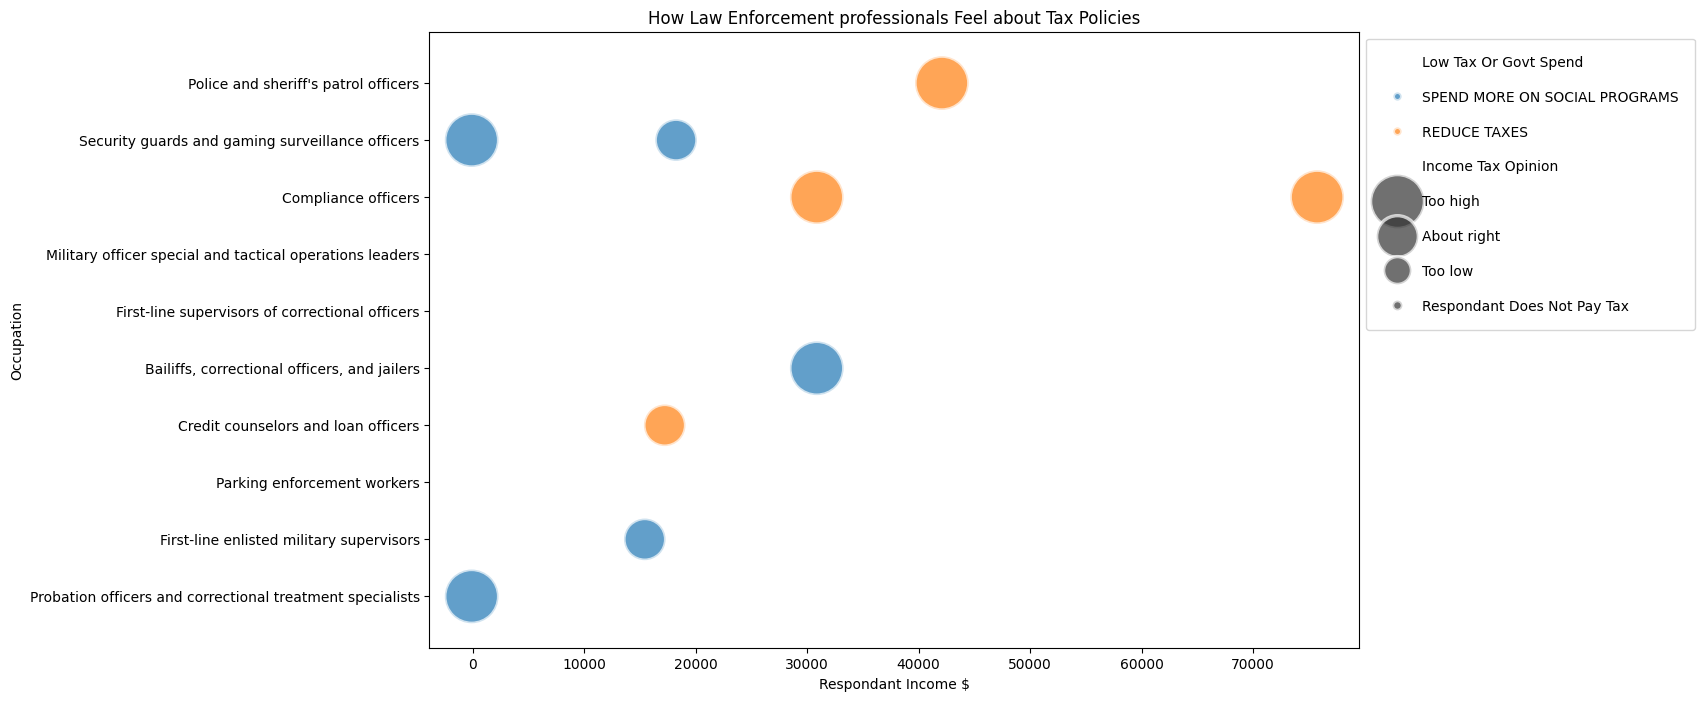

Income Tax Opinion
Too high                       546
About right                    321
Too low                          9
Respondant Does Not Pay Tax      0
Name: count, dtype: int64 
 proportion of people who thinks tax is too high: 62.33%
 proportion of people who thinks tax is about right: 36.64%
 proportion of people who thinks tax is too low: 1.03%
 proportion of people does not pay tax: 0.00%

 Low Tax Or Govt Spend
SPEND MORE ON SOCIAL PROGRAMS    8
REDUCE TAXES                     5
Name: count, dtype: int64 
 proportion of people who thinks tax should be spent on social programs: 61.54%
 proportion of people who thinks tax should be reduced: 38.46%


In [72]:
df_compare3 = df[['year', 'Respondant Income', 'Income Tax Opinion','Low Tax Or Govt Spend', 'Income Group', 'Occupation']].copy()
df_compare3['Respondant Income'] = df_compare3['Respondant Income'].replace(replacement_values)
df_compare3['Low Tax Or Govt Spend'] = df_compare3['Low Tax Or Govt Spend'].replace(replacement_values)
df_compare3['Income Tax Opinion'] = df_compare3['Income Tax Opinion'].replace(replacement_values)

cat_order = ['Too high', 'About right', 'Too low', 'Respondant Does Not Pay Tax']
df_compare3['Income Tax Opinion'] = pd.Categorical(df_compare3['Income Tax Opinion'], categories=cat_order, ordered=True)

# capturing keywords 'enforcement|officer|military|police' to represent the law enforcement sector
df_compare3 = df_compare3[df_compare3['Occupation'].str.contains('enforcement|officer|military|police', case=False, na=False)]
plt.figure(figsize=(12, 8))

# manipulating the size of the bubbles
size_mapping = {
    'Too high': 1500,
    'About right': 900,
    'Too low': 400,
    'Respondant Does Not Pay Tax': 50
}
sns.scatterplot(data=df_compare3, x='Respondant Income',y='Occupation', hue='Low Tax Or Govt Spend', size='Income Tax Opinion', sizes=size_mapping, alpha=0.7)
plt.title('How Law Enforcement professionals Feel about Tax Policies')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderpad=1.2, labelspacing=1.5, markerscale=1)
plt.gca().margins(y=0.1)

plt.xlabel('Respondant Income $')
plt.show()

# calculating proportions of opinion distribution
prop_high = ((df_compare3['Income Tax Opinion'] == 'Too high').sum() / df_compare3['Income Tax Opinion'].count()) * 100
prop_about = ((df_compare3['Income Tax Opinion'] == 'About right').sum() / df_compare3['Income Tax Opinion'].count()) * 100
prop_low = ((df_compare3['Income Tax Opinion'] == 'Too low').sum() / df_compare3['Income Tax Opinion'].count()) * 100
prop_respondant = ((df_compare3['Income Tax Opinion'] == 'Respondant Does Not Pay Tax').sum() / df_compare3['Income Tax Opinion'].count()) * 100

prop_spend = ((df_compare3['Low Tax Or Govt Spend'] == 'SPEND MORE ON SOCIAL PROGRAMS').sum() / df_compare3['Low Tax Or Govt Spend'].count()) * 100
prop_lower = ((df_compare3['Low Tax Or Govt Spend'] == 'REDUCE TAXES').sum() / df_compare3['Low Tax Or Govt Spend'].count()) * 100

print(df_compare3['Income Tax Opinion'].value_counts(), f'\n proportion of people who thinks tax is too high: {prop_high:.2f}%\n proportion of people who thinks tax is about right: {prop_about:.2f}%\n proportion of people who thinks tax is too low: {prop_low:.2f}%\n proportion of people does not pay tax: {prop_respondant:.2f}%')

print('\n', df_compare3['Low Tax Or Govt Spend'].value_counts(), f'\n proportion of people who thinks tax should be spent on social programs: {prop_spend:.2f}%\n proportion of people who thinks tax should be reduced: {prop_lower:.2f}%')

# How all professionals feel about Tax policies in general

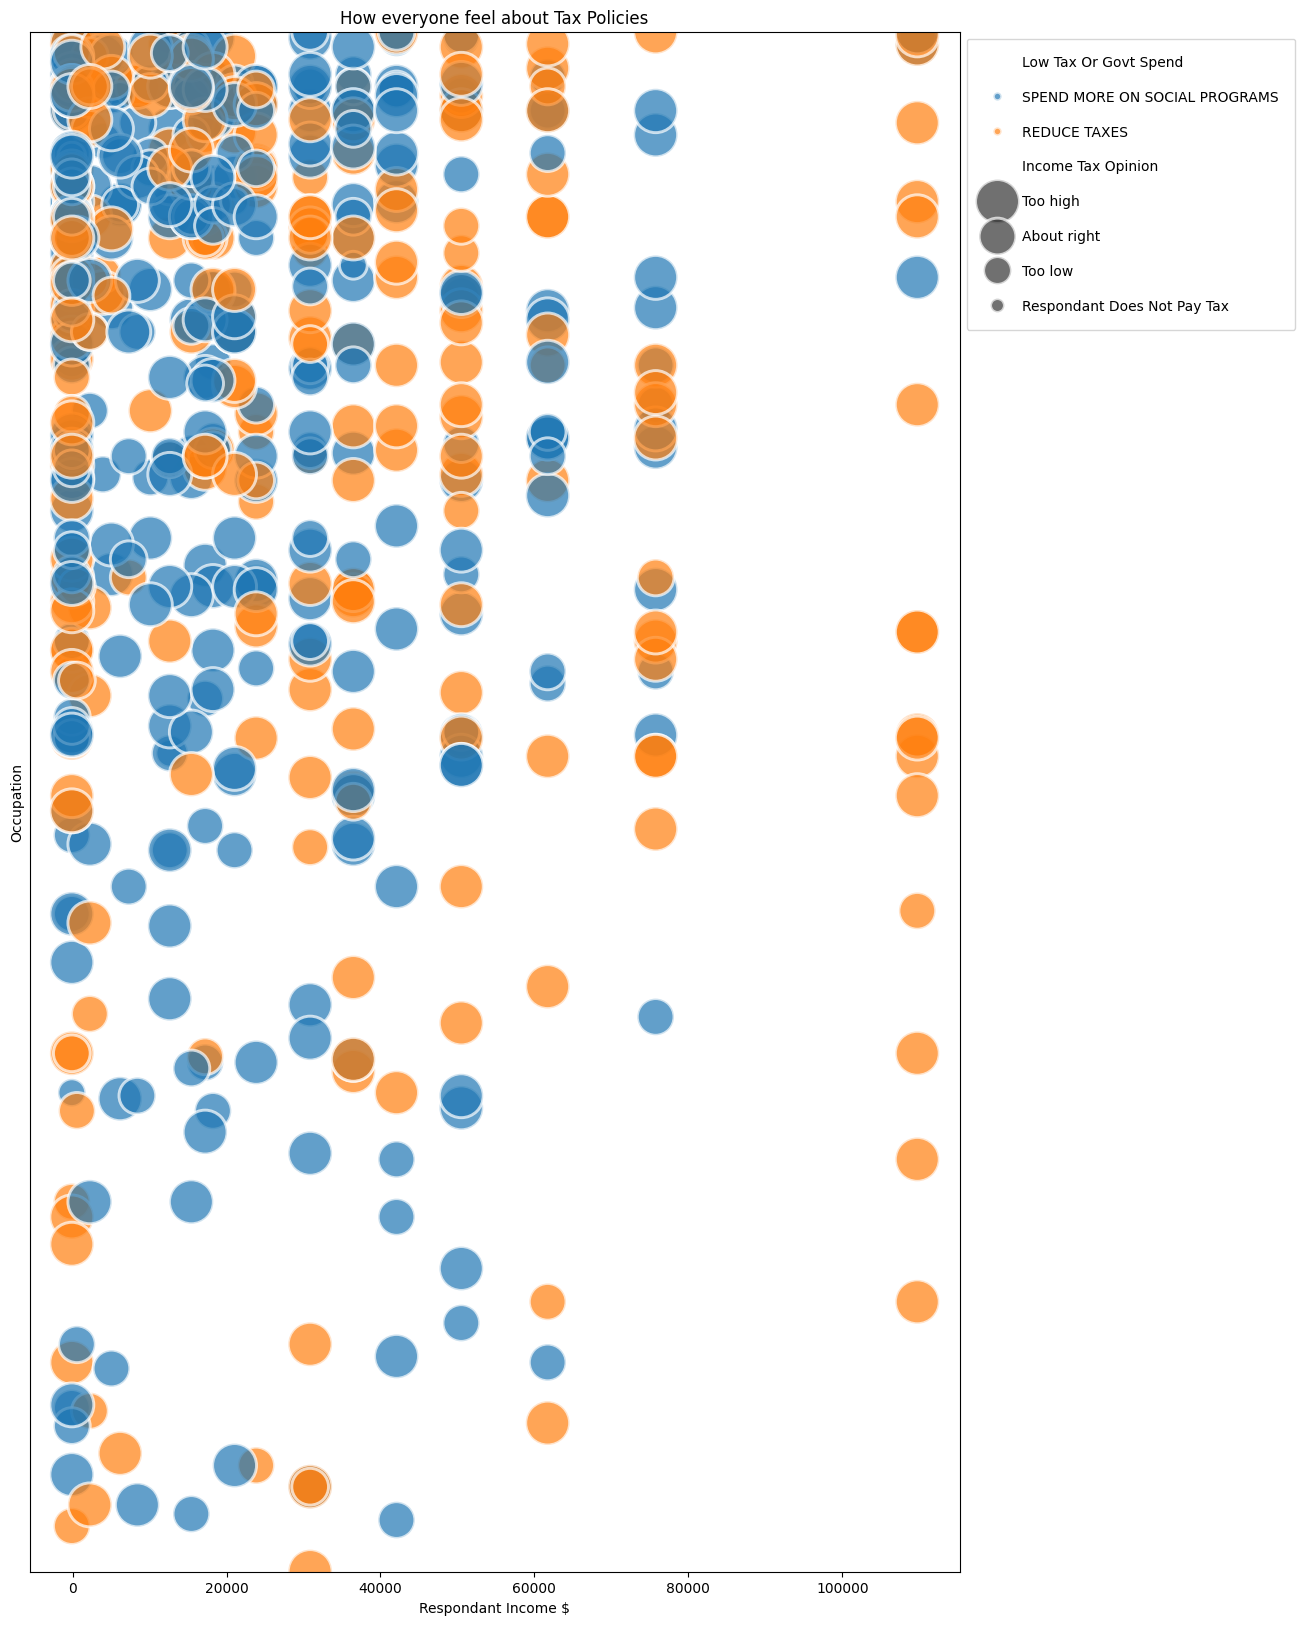

Income Tax Opinion
Too high                       23633
About right                    14138
Too low                          503
Respondant Does Not Pay Tax        0
Name: count, dtype: int64 
 proportion of people who thinks tax is too high: 61.75%
 proportion of people who thinks tax is about right: 36.94%
 proportion of people who thinks tax is too low: 1.31%
 proportion of people does not pay tax: 0.00%

 Low Tax Or Govt Spend
SPEND MORE ON SOCIAL PROGRAMS    591
REDUCE TAXES                     400
Name: count, dtype: int64 
 proportion of people who thinks tax should be spent on social programs: 59.64%
 proportion of people who thinks tax should be reduced: 40.36%


In [73]:
df_compare3 = df[['year', 'Respondant Income', 'Income Tax Opinion','Low Tax Or Govt Spend', 'Income Group', 'Occupation']].copy()
df_compare3['Respondant Income'] = df_compare3['Respondant Income'].replace(replacement_values)
df_compare3['Low Tax Or Govt Spend'] = df_compare3['Low Tax Or Govt Spend'].replace(replacement_values)
df_compare3['Income Tax Opinion'] = df_compare3['Income Tax Opinion'].replace(replacement_values)

cat_order = ['Too high', 'About right', 'Too low', 'Respondant Does Not Pay Tax']
df_compare3['Income Tax Opinion'] = pd.Categorical(df_compare3['Income Tax Opinion'], categories=cat_order, ordered=True)

# capturing no keywords, essentially including all professionals
df_compare3 = df_compare3[df_compare3['Occupation'].str.contains('', case=False, na=False)]
plt.figure(figsize=(12, 20))

sns.scatterplot(data=df_compare3, x='Respondant Income',y='Occupation', hue='Low Tax Or Govt Spend', size='Income Tax Opinion', sizes=(100,1000), alpha=0.7)
plt.title('How everyone feel about Tax Policies')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderpad=1.2, labelspacing=1.5, markerscale=1)
plt.gca().margins(y=0.0001)

# This is to remove the occupation labels as it is a total mess when every occupation name is displayed on the y-axis
plt.yticks([])
plt.xlabel('Respondant Income $')
plt.show()

# calculating the proportion of the opinion distribution
prop_high = ((df_compare3['Income Tax Opinion'] == 'Too high').sum() / df_compare3['Income Tax Opinion'].count()) * 100
prop_about = ((df_compare3['Income Tax Opinion'] == 'About right').sum() / df_compare3['Income Tax Opinion'].count()) * 100
prop_low = ((df_compare3['Income Tax Opinion'] == 'Too low').sum() / df_compare3['Income Tax Opinion'].count()) * 100
prop_respondant = ((df_compare3['Income Tax Opinion'] == 'Respondant Does Not Pay Tax').sum() / df_compare3['Income Tax Opinion'].count()) * 100

prop_spend = ((df_compare3['Low Tax Or Govt Spend'] == 'SPEND MORE ON SOCIAL PROGRAMS').sum() / df_compare3['Low Tax Or Govt Spend'].count()) * 100
prop_lower = ((df_compare3['Low Tax Or Govt Spend'] == 'REDUCE TAXES').sum() / df_compare3['Low Tax Or Govt Spend'].count()) * 100

print(df_compare3['Income Tax Opinion'].value_counts(), f'\n proportion of people who thinks tax is too high: {prop_high:.2f}%\n proportion of people who thinks tax is about right: {prop_about:.2f}%\n proportion of people who thinks tax is too low: {prop_low:.2f}%\n proportion of people does not pay tax: {prop_respondant:.2f}%')

print('\n', df_compare3['Low Tax Or Govt Spend'].value_counts(), f'\n proportion of people who thinks tax should be spent on social programs: {prop_spend:.2f}%\n proportion of people who thinks tax should be reduced: {prop_lower:.2f}%')